In [42]:
import mplfinance as mpf
import pandas as pd
import requests
import numpy as np
import json

In [43]:
file = open(r"C:\Users\adity\Downloads\NSE.json\NSE.json", 'r')
nifty_smallcap_100 = json.loads(file.read())

for i in nifty_smallcap_100:
    if i['segment'] == 'NSE_INDEX':
        print(i['instrument_key'])

NSE_INDEX|NIFTY100 Qualty30
NSE_INDEX|HangSeng BeES-NAV
NSE_INDEX|Nifty Consumption
NSE_INDEX|Nifty Rural
NSE_INDEX|Nifty CoreHousing
NSE_INDEX|Nifty Realty
NSE_INDEX|NIFTY100 ESG
NSE_INDEX|Nifty EV
NSE_INDEX|Nifty IT
NSE_INDEX|Nifty PSE
NSE_INDEX|Nifty 50
NSE_INDEX|Nifty Next 50
NSE_INDEX|Nifty IPO
NSE_INDEX|India VIX
NSE_INDEX|Nifty MNC
NSE_INDEX|NIFTY IND DIGITAL
NSE_INDEX|NIFTY MICROCAP250
NSE_INDEX|Nifty Sml250 Q50
NSE_INDEX|Nifty50 Value 20
NSE_INDEX|NiftyM150Momntm50
NSE_INDEX|Nifty500 LMS Eql
NSE_INDEX|Nifty500 Qlty50
NSE_INDEX|NIFTY INDIA MFG
NSE_INDEX|Nifty50 TR 2x Lev
NSE_INDEX|Nifty100ESGSecLdr
NSE_INDEX|Nifty Multi MQ 50
NSE_INDEX|Nifty AQL 30
NSE_INDEX|Nifty500 LowVol50
NSE_INDEX|Nifty HighBeta 50
NSE_INDEX|Nifty200 Alpha 30
NSE_INDEX|Nifty FinSrv25 50
NSE_INDEX|Nifty Pvt Bank
NSE_INDEX|NIFTY CONSR DURBL
NSE_INDEX|Nifty New Consump
NSE_INDEX|Nifty Ind Defence
NSE_INDEX|Nifty100 Liq 15
NSE_INDEX|Nifty Low Vol 50
NSE_INDEX|Nifty GS 8 13Yr
NSE_INDEX|NIFTY OIL AND GAS
NSE_IND

In [44]:
instr_key = "NSE_INDEX|NIFTY SMLCAP 250"

In [45]:
symbols = {'OLAELEC':'NSE_EQ%7CINE0LXG01040', 'WHIRLPOOL':'NSE_EQ%7CINE716A01013', 'SAGILITY':'NSE_EQ%7CINE0W2G01015',
        'RAMCOCEM':'NSE_EQ%7CINE331A01037', 'TATACHEM':'NSE_EQ%7CINE092A01019', 'INDEX':instr_key}
to_date = '2025-10-10'
from_date = '2024-10-10' 
frequency = '1'
interval = 'days'
returns = pd.DataFrame()

for symbol in symbols:
    url = f"https://api.upstox.com/v3/historical-candle/{symbols[symbol]}/{interval}/{frequency}/{to_date}/{from_date}"
    print(url)
    headers = {
    'Accept': 'application/json'
    }
    response = requests.get(url, headers=headers)
    # Check the response status
    if response.status_code == 200:
        # Do something with the response data (e.g., print it)
        print(response.json())
    else:
        # Print an error message if the request was not successful
        print(f"Error: {response.status_code} - {response.text}")

    response_dict = response.json()
    df = pd.DataFrame(response_dict['data']['candles'], columns=['date', 'open', 'high', 'low', 'close', 'vol', 'misc'])
    df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
    df = df[::-1]
    df['log_returns'] = np.log(df['close'] / df['close'].shift(-1))
    #df['returns'] = (df['close']-df['close'].shift(-1))/df['close'].shift(-1)
    df['returns'] = df['close'].pct_change()
    returns[symbol] = df['returns']

https://api.upstox.com/v3/historical-candle/NSE_EQ%7CINE0LXG01040/days/1/2025-10-10/2024-10-10
{'status': 'success', 'data': {'candles': [['2025-10-10T00:00:00+05:30', 50.0, 50.9, 49.02, 49.7, 14678032, 0], ['2025-10-09T00:00:00+05:30', 51.15, 51.65, 49.41, 50.2, 18683965, 0], ['2025-10-08T00:00:00+05:30', 52.89, 52.95, 51.0, 51.23, 13839880, 0], ['2025-10-07T00:00:00+05:30', 52.89, 54.29, 52.48, 52.61, 15016803, 0], ['2025-10-06T00:00:00+05:30', 54.0, 54.16, 51.9, 52.62, 19925009, 0], ['2025-10-03T00:00:00+05:30', 55.14, 55.55, 53.5, 53.99, 17624383, 0], ['2025-10-01T00:00:00+05:30', 57.6, 58.65, 55.32, 55.85, 18327281, 0], ['2025-09-30T00:00:00+05:30', 54.14, 56.95, 53.56, 56.95, 18935888, 0], ['2025-09-29T00:00:00+05:30', 54.75, 54.88, 53.1, 54.24, 21340221, 0], ['2025-09-26T00:00:00+05:30', 55.35, 55.4, 53.56, 54.92, 19469851, 0], ['2025-09-25T00:00:00+05:30', 56.85, 57.24, 54.55, 56.04, 18048277, 0], ['2025-09-24T00:00:00+05:30', 58.45, 58.6, 56.53, 56.89, 13013302, 0], ['2025-09-

In [46]:
df.head()

,date,open,high,low,close,vol,misc,log_returns,returns
date,,,,,,,,,
2024-10-10 00:00:00+05:30,2024-10-10T00:00:00+05:30,18205.55,18248.00,18114.15,18127.35,0,0,-0.004714,NaN
2024-10-11 00:00:00+05:30,2024-10-11T00:00:00+05:30,18166.70,18247.45,18114.20,18213.00,0,0,-0.002857,0.004725
2024-10-14 00:00:00+05:30,2024-10-14T00:00:00+05:30,18274.75,18303.85,18189.25,18265.10,0,0,-0.011028,0.002861
2024-10-15 00:00:00+05:30,2024-10-15T00:00:00+05:30,18338.95,18483.60,18326.80,18467.65,0,0,-0.002072,0.011089
2024-10-16 00:00:00+05:30,2024-10-16T00:00:00+05:30,18464.65,18525.60,18365.60,18505.95,0,0,0.014240,0.002074


In [47]:
df.tail()

,date,open,high,low,close,vol,misc,log_returns,returns
date,,,,,,,,,
2025-10-06 00:00:00+05:30,2025-10-06T00:00:00+05:30,17065.70,17069.25,16984.05,17030.15,0,0,-0.001097,0.000873
2025-10-07 00:00:00+05:30,2025-10-07T00:00:00+05:30,17068.45,17106.90,17011.20,17048.85,0,0,0.005429,0.001098
2025-10-08 00:00:00+05:30,2025-10-08T00:00:00+05:30,17069.05,17096.40,16936.75,16956.55,0,0,-0.003018,-0.005414
2025-10-09 00:00:00+05:30,2025-10-09T00:00:00+05:30,16988.75,17015.20,16910.50,17007.80,0,0,-0.006152,0.003022
2025-10-10 00:00:00+05:30,2025-10-10T00:00:00+05:30,17037.35,17130.55,16986.15,17112.75,0,0,NaN,0.006171


<Axes: xlabel='date'>

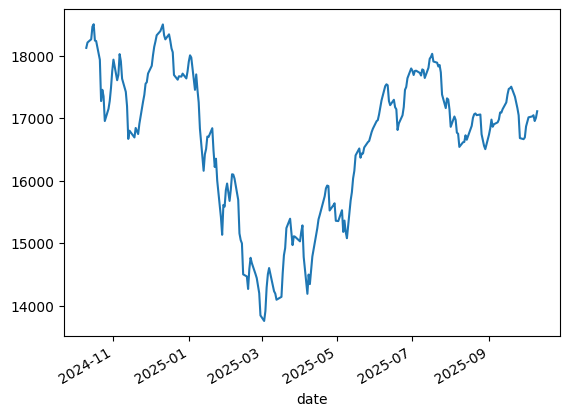

In [56]:
df['close'].plot()

In [48]:
returns.dropna(inplace=True)
returns

,OLAELEC,WHIRLPOOL,SAGILITY,RAMCOCEM,TATACHEM,INDEX
date,,,,,,
2024-11-13 00:00:00+05:30,-0.044959,-0.008331,-0.025239,-0.028681,-0.029095,-0.030591
2024-11-14 00:00:00+05:30,-0.011698,0.013149,-0.002449,0.020873,0.016712,0.007870
2024-11-18 00:00:00+05:30,-0.016971,0.015031,0.035777,-0.009087,0.000378,-0.006440
2024-11-19 00:00:00+05:30,0.005658,0.003552,-0.009482,0.010513,0.008782,0.009099
2024-11-21 00:00:00+05:30,-0.030439,-0.054831,-0.033846,0.012617,-0.021671,-0.005782
...,...,...,...,...,...,...
2025-10-06 00:00:00+05:30,-0.025375,0.003307,0.017265,-0.010356,0.001351,0.000873
2025-10-07 00:00:00+05:30,-0.000190,0.008535,0.012899,0.026748,-0.005125,0.001098
2025-10-08 00:00:00+05:30,-0.026231,-0.024300,0.006256,-0.007060,-0.015293,-0.005414


In [49]:
returns.mean()

OLAELEC     -0.001015
WHIRLPOOL   -0.001545
SAGILITY     0.002448
RAMCOCEM     0.000635
TATACHEM    -0.000637
INDEX        0.000059
dtype: float64

In [50]:
returns.var()

OLAELEC      0.001606
WHIRLPOOL    0.000671
SAGILITY     0.000849
RAMCOCEM     0.000272
TATACHEM     0.000246
INDEX        0.000162
dtype: float64

In [51]:
returns.std()

OLAELEC      0.040072
WHIRLPOOL    0.025899
SAGILITY     0.029137
RAMCOCEM     0.016491
TATACHEM     0.015694
INDEX        0.012719
dtype: float64

In [52]:
returns.cov()

,OLAELEC,WHIRLPOOL,SAGILITY,RAMCOCEM,TATACHEM,INDEX
OLAELEC,0.001606,0.000118,0.000262,0.000140,0.000198,0.000218
WHIRLPOOL,0.000118,0.000671,0.000093,0.000096,0.000111,0.000124
SAGILITY,0.000262,0.000093,0.000849,0.000086,0.000148,0.000171
RAMCOCEM,0.000140,0.000096,0.000086,0.000272,0.000114,0.000109
TATACHEM,0.000198,0.000111,0.000148,0.000114,0.000246,0.000137
INDEX,0.000218,0.000124,0.000171,0.000109,0.000137,0.000162


In [53]:
returns.corr(method='pearson')

,OLAELEC,WHIRLPOOL,SAGILITY,RAMCOCEM,TATACHEM,INDEX
OLAELEC,1.000000,0.114117,0.224696,0.211730,0.314304,0.427053
WHIRLPOOL,0.114117,1.000000,0.122757,0.223807,0.273664,0.377040
SAGILITY,0.224696,0.122757,1.000000,0.178779,0.322840,0.461289
RAMCOCEM,0.211730,0.223807,0.178779,1.000000,0.441263,0.517402
TATACHEM,0.314304,0.273664,0.322840,0.441263,1.000000,0.686556
INDEX,0.427053,0.377040,0.461289,0.517402,0.686556,1.000000


In [54]:
returns.to_csv('data/returns.csv')